In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import numpy as np

import sys
import os
# Current working directory in Jupyter Notebook
project_root = os.getcwd()  # Current working directory
project_root = os.path.join(project_root, '..')  # Move one level up to the root
sys.path.append(project_root)
# from importlib import reload
# import utils.custom
# reload(utils.custom)
from utils.custom import calculate_metrics, plot_returns
from definitions.constants import DIFF_REBALANCING_STOCK_DICT_ALL_PKL, DIFF_REBALANCING_RETURNS_ALL_PKL, DATE_GS_CUTOFF #DIFF_REBALANCING_COMBINED_DATA_CSV


# dfsfilename=DIFF_REBALANCING_COMBINED_DATA_ALL_CSV
# dfsfilename=dfsfilename
# picasodfs=pd.read_pickle(dfsfilename)

stock_dict_filename=DIFF_REBALANCING_STOCK_DICT_ALL_PKL
stock_dict_filename=stock_dict_filename
stks=pd.read_pickle(stock_dict_filename)

rets_filename=DIFF_REBALANCING_RETURNS_ALL_PKL
rets_filename=rets_filename
retss=pd.read_pickle(rets_filename)


In [10]:
# picasodfs[0]

In [11]:
retss[0]

,returns
t,
2007-01-31,-4.091614
2007-02-28,12.078904
2007-03-30,5.743846
2007-04-30,21.586820
2007-05-31,-0.032373
...,...
2024-10-31,3.066073
2024-11-29,10.704353
2024-12-31,-0.876698


In [12]:
stks[0]

{'2007-01-31': array(['VNQ'], dtype=object),
 '2007-02-28': array(['AAPL'], dtype=object),
 '2007-03-30': array(['AAPL'], dtype=object),
 '2007-04-30': array(['AAPL'], dtype=object),
 '2007-05-31': array(['AAPL'], dtype=object),
 '2007-06-29': array(['AAPL'], dtype=object),
 '2007-07-31': array(['AAPL'], dtype=object),
 '2007-08-31': array(['AAPL'], dtype=object),
 '2007-09-28': array(['AAPL'], dtype=object),
 '2007-10-31': array(['AAPL'], dtype=object),
 '2007-11-30': array(['AAPL'], dtype=object),
 '2007-12-31': array(['AAPL'], dtype=object),
 '2008-01-31': array(['DBA'], dtype=object),
 '2008-02-29': array(['SLV'], dtype=object),
 '2008-03-31': array(['DBC'], dtype=object),
 '2008-04-30': array(['AAPL'], dtype=object),
 '2008-05-30': array(['GSG'], dtype=object),
 '2008-06-30': array(['GSG'], dtype=object),
 '2008-07-31': array(['DBC'], dtype=object),
 '2008-08-29': array(['DBC'], dtype=object),
 '2008-09-30': array([], dtype=float64),
 '2008-10-31': array([], dtype=float64),
 '2008

In [13]:
# Initialize lists to store metrics
annual_returns = []
sharpe_ratios = []
max_drawdowns = []
calmar_ratios = []
sortino_ratios = []

for number in range(18):
    print(f"*******************{number}************************")
    annual_return, sharpe_ratio, max_drawdown_value, calmar_ratio, sortino_ratio = calculate_metrics(returns=retss[number])#[(retss[number].index>'2009-01-01')]

    # Append metrics to their respective lists
    annual_returns.append(annual_return)
    sharpe_ratios.append(sharpe_ratio)
    max_drawdowns.append(max_drawdown_value)
    calmar_ratios.append(calmar_ratio)
    sortino_ratios.append(sortino_ratio)

    # Print results
    print(f"Annual Return: {annual_return * 100:.2f}%")
    print(f"Sharpe Ratio: {sharpe_ratio:.2f}")
    print(f"Max Drawdown: {max_drawdown_value * 100:.2f}%")
    print(f"Calmar Ratio: {calmar_ratio:.2f}")
    print(f"Sortino Ratio: {sortino_ratio:.2f}")

# Calculate averages
avg_annual_return = sum(annual_returns) / len(annual_returns)
avg_sharpe_ratio = sum(sharpe_ratios) / len(sharpe_ratios)
avg_max_drawdown = sum(max_drawdowns) / len(max_drawdowns)
avg_calmar_ratio = sum(calmar_ratios) / len(calmar_ratios)
avg_sortino_ratio = sum(sortino_ratios) / len(sortino_ratios)

# Print averages
print("\n********** Averages **********")
print(f"Average Annual Return: {avg_annual_return * 100:.2f}%")
print(f"Average Sharpe Ratio: {avg_sharpe_ratio:.2f}")
print(f"Average Max Drawdown: {avg_max_drawdown * 100:.2f}%")
print(f"Average Calmar Ratio: {avg_calmar_ratio:.2f}")
print(f"Average Sortino Ratio: {avg_sortino_ratio:.2f}")


*******************0************************
Annual Return: 39.59%
Sharpe Ratio: 0.99
Max Drawdown: 44.79%
Calmar Ratio: 0.88
Sortino Ratio: 1.80
*******************1************************
Annual Return: 32.85%
Sharpe Ratio: 0.85
Max Drawdown: 61.24%
Calmar Ratio: 0.54
Sortino Ratio: 1.37
*******************2************************
Annual Return: 29.54%
Sharpe Ratio: 0.80
Max Drawdown: 56.00%
Calmar Ratio: 0.53
Sortino Ratio: 1.28
*******************3************************
Annual Return: 34.07%
Sharpe Ratio: 0.88
Max Drawdown: 49.63%
Calmar Ratio: 0.69
Sortino Ratio: 1.55
*******************4************************
Annual Return: 39.55%
Sharpe Ratio: 1.00
Max Drawdown: 41.76%
Calmar Ratio: 0.95
Sortino Ratio: 1.62
*******************5************************
Annual Return: 37.81%
Sharpe Ratio: 0.97
Max Drawdown: 55.19%
Calmar Ratio: 0.69
Sortino Ratio: 1.57
*******************6************************
Annual Return: 37.92%
Sharpe Ratio: 0.93
Max Drawdown: 55.81%
Calmar Ratio: 0.6

In [14]:
# Initialize lists to store metrics
annual_returns = []
sharpe_ratios = []
max_drawdowns = []
calmar_ratios = []
sortino_ratios = []

for number in range(18):
    print(f"*******************{number}************************")
    annual_return, sharpe_ratio, max_drawdown_value, calmar_ratio, sortino_ratio = calculate_metrics(returns=retss[number][(retss[number].index<=DATE_GS_CUTOFF)])#&(retss[number].index>'2009-01-01')

    # Append metrics to their respective lists
    annual_returns.append(annual_return)
    sharpe_ratios.append(sharpe_ratio)
    max_drawdowns.append(max_drawdown_value)
    calmar_ratios.append(calmar_ratio)
    sortino_ratios.append(sortino_ratio)

    # Print results
    print(f"Annual Return: {annual_return * 100:.2f}%")
    print(f"Sharpe Ratio: {sharpe_ratio:.2f}")
    print(f"Max Drawdown: {max_drawdown_value * 100:.2f}%")
    print(f"Calmar Ratio: {calmar_ratio:.2f}")
    print(f"Sortino Ratio: {sortino_ratio:.2f}")

# Calculate averages
avg_annual_return = sum(annual_returns) / len(annual_returns)
avg_sharpe_ratio = sum(sharpe_ratios) / len(sharpe_ratios)
avg_max_drawdown = sum(max_drawdowns) / len(max_drawdowns)
avg_calmar_ratio = sum(calmar_ratios) / len(calmar_ratios)
avg_sortino_ratio = sum(sortino_ratios) / len(sortino_ratios)

# Print averages
print("\n********** Averages **********")
print(f"Average Annual Return: {avg_annual_return * 100:.2f}%")
print(f"Average Sharpe Ratio: {avg_sharpe_ratio:.2f}")
print(f"Average Max Drawdown: {avg_max_drawdown * 100:.2f}%")
print(f"Average Calmar Ratio: {avg_calmar_ratio:.2f}")
print(f"Average Sortino Ratio: {avg_sortino_ratio:.2f}")


*******************0************************
Annual Return: 23.97%
Sharpe Ratio: 0.85
Max Drawdown: 44.79%
Calmar Ratio: 0.54
Sortino Ratio: 1.22
*******************1************************
Annual Return: 16.91%
Sharpe Ratio: 0.64
Max Drawdown: 61.24%
Calmar Ratio: 0.28
Sortino Ratio: 0.78
*******************2************************
Annual Return: 15.64%
Sharpe Ratio: 0.61
Max Drawdown: 56.00%
Calmar Ratio: 0.28
Sortino Ratio: 0.79
*******************3************************
Annual Return: 17.27%
Sharpe Ratio: 0.65
Max Drawdown: 49.63%
Calmar Ratio: 0.35
Sortino Ratio: 0.98
*******************4************************
Annual Return: 27.13%
Sharpe Ratio: 0.94
Max Drawdown: 36.87%
Calmar Ratio: 0.74
Sortino Ratio: 1.40
*******************5************************
Annual Return: 16.80%
Sharpe Ratio: 0.65
Max Drawdown: 55.19%
Calmar Ratio: 0.30
Sortino Ratio: 0.88
*******************6************************
Annual Return: 18.69%
Sharpe Ratio: 0.68
Max Drawdown: 55.81%
Calmar Ratio: 0.3

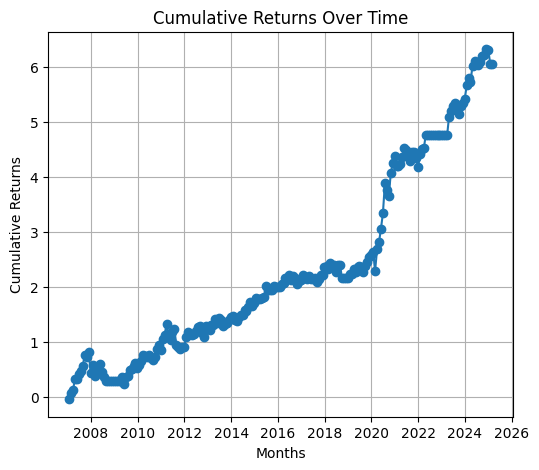

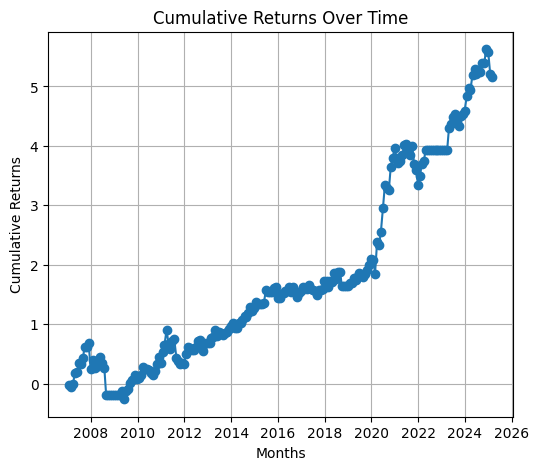

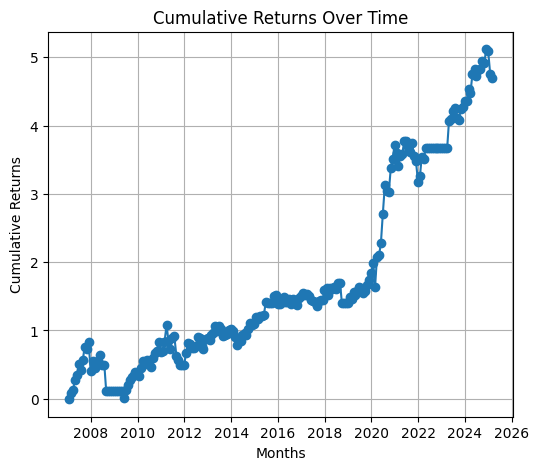

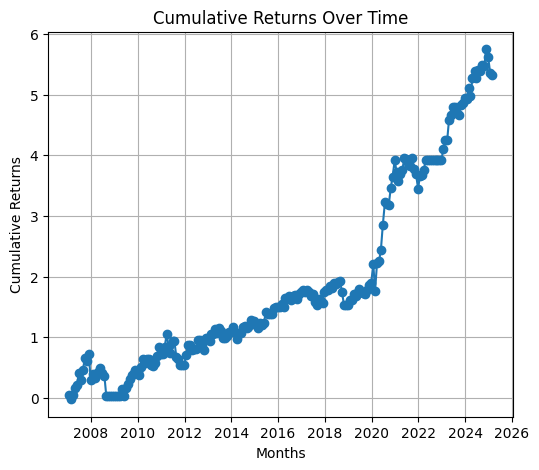

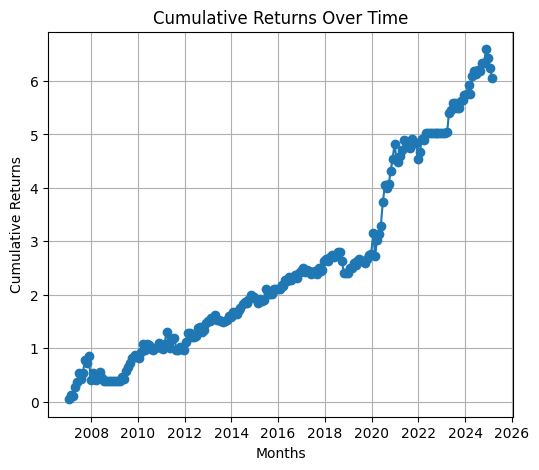

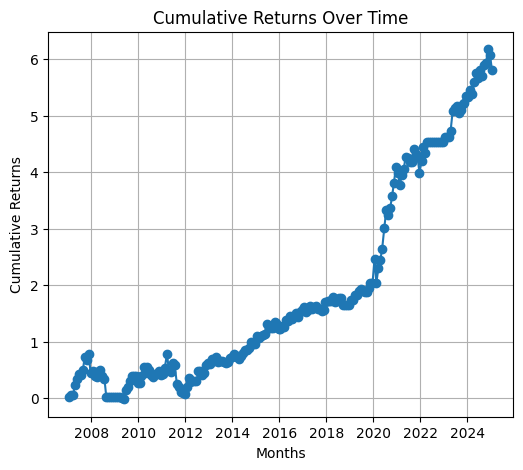

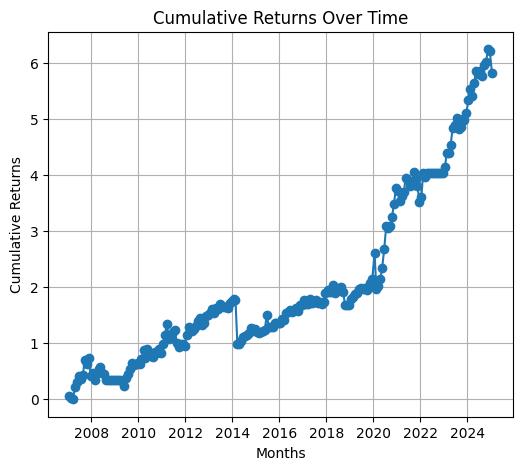

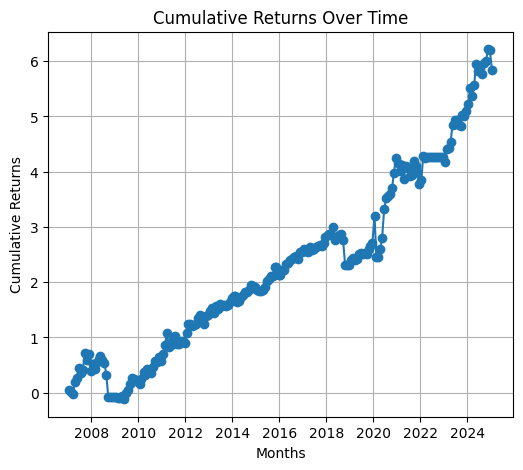

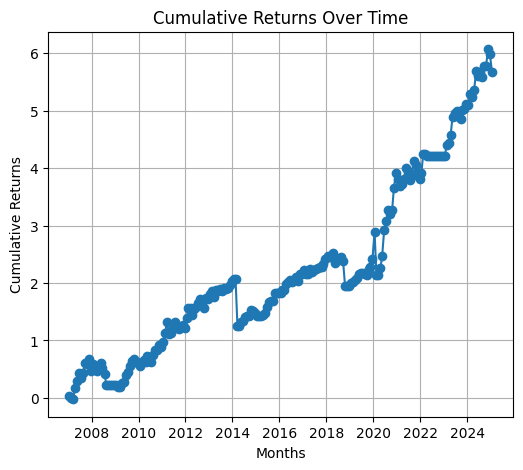

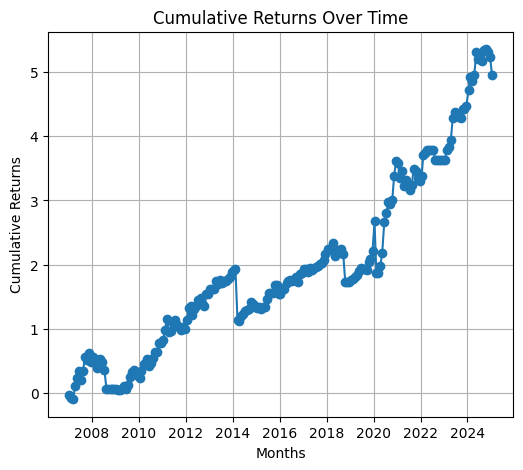

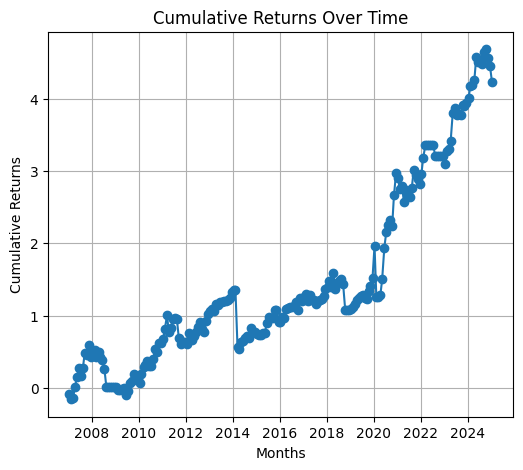

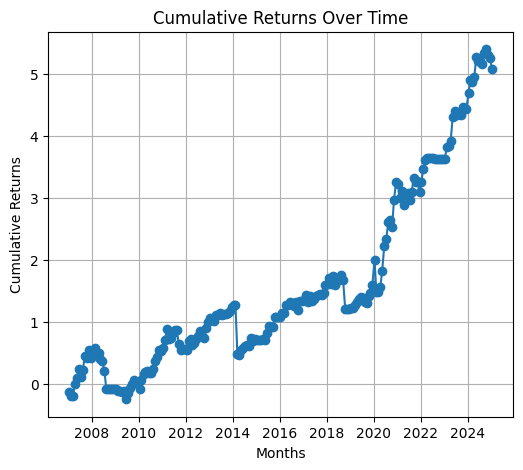

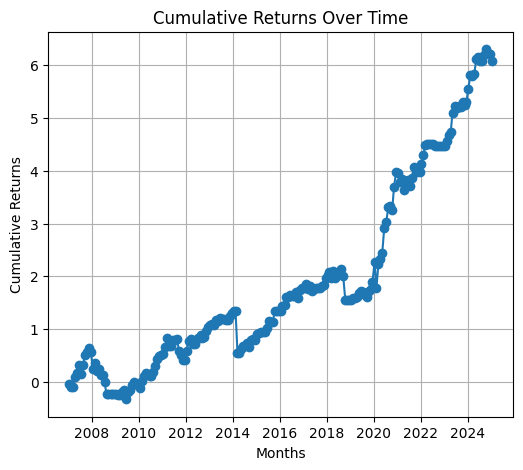

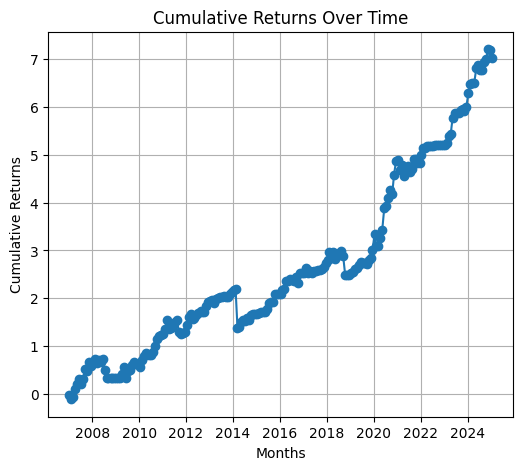

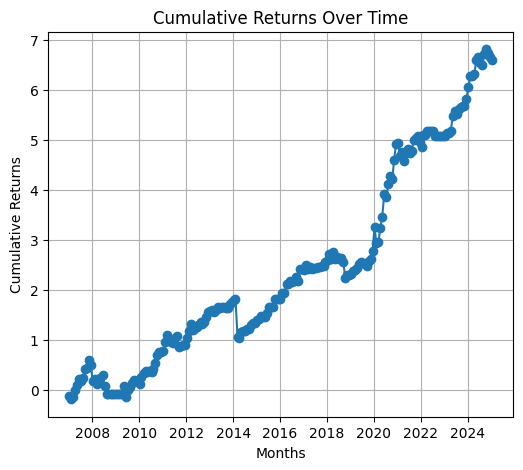

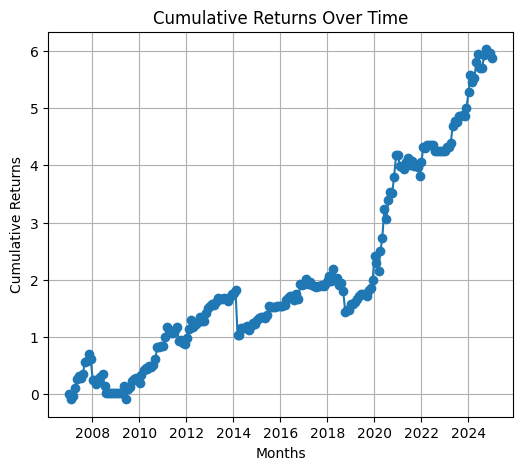

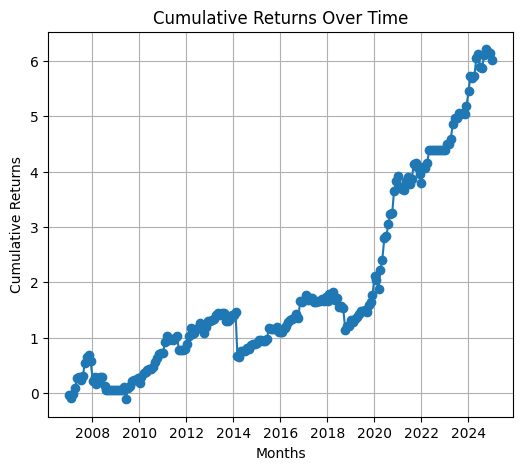

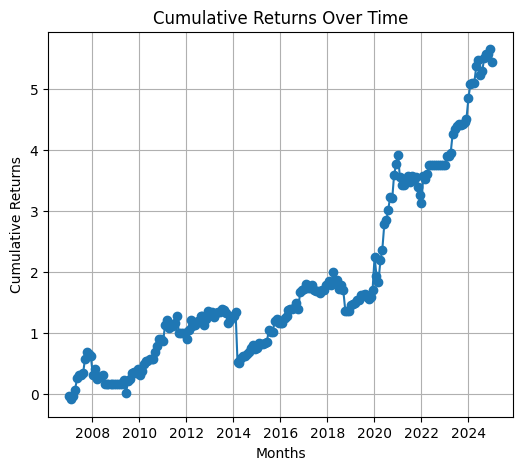

In [15]:
for number in range(18):
    plot_returns(returns=retss[number], diffRebal=True)